# Machine Learning Capstone Project

## Project : Object Recognition in Images
In this project we will discover the CIFAR-10 dataset and we will develop a deep learning model in Python using the Keras library that will be capable of achieving good results. Recognizing photos from the cifar-10 collection is one of the most common problems in the today’s  world of machine learning. We will now see step by step how to build multi-layer neural networks that will recognize images from a cifar-10 dataset with an accuracy of about 80% and visualize it.
Now some questions come to mind:
- What is Keras?
- Keras is an open source neural network library written in Python and capable of running on top of either TensorFlow, CNTK or Theano. Advantages of keras:
  - Allows for easy and fast prototyping
  - Supports both convolutional networks and recurrent networks, as well as combinations of the two
  - Runs seamlessly on CPU and GPU
  - Keras is compatible with Python 2.7-3.5.
  - Since Semptember 2016, Keras is the second-fastest growing Deep Learning framework after Google's Tensorflow, and the third largest after Tensorflow and Caffe.
- What is Deep Learning?
- Deep Learning is the application to learning tasks of artificial neural networks(ANNs) that contain more than one hidden layer. Deep learning is part of Machine Learning methods based on learning data representations. Learning can be supervised, parially supervised or unsupervised.

## Exploring the Data

### Load image data from CIFAR-10 dataset

In [1]:
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# The number of training and testing images present in the dataset
print('There are %d training images.' % len(x_train))
print('There are %d testing images.' % len(x_test))

Using TensorFlow backend.


There are 50000 training images.
There are 10000 testing images.


Let's look at some samples from the dataset:

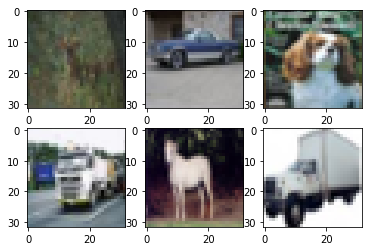

In [2]:
import matplotlib.pyplot as plt

# plot some random images 
plt.subplot(231)
plt.imshow(x_train[10])
plt.subplot(232)
plt.imshow(x_train[10000])
plt.subplot(233)
plt.imshow(x_train[5369])
plt.subplot(234)
plt.imshow(x_train[1000])
plt.subplot(235)
plt.imshow(x_train[46666])
plt.subplot(236)
plt.imshow(x_train[1231])

# show the plot
plt.show()

We also need to take a look at dimensions of the input images from the dataset so that we can decide whether it needs dimension reshaping or not before getting it as input to the neural networks.

In [7]:
# printing shape of training dataset
print ('Shape of training dataset:') 
print (x_train.shape)

# printing shape of testing dataset
print ('Shape of testing dataset:')
print (x_test.shape)

Shape of training dataset:
(50000, 3, 32, 32)
Shape of testing dataset:
(10000, 3, 32, 32)


It's a good practice to declare our variables:

- *batch_size* – the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you’ll need
- *num_classes* – number of cifar-10 data set classes
- *one epoch* – one forward pass and one backward pass of all the training examples

In [4]:
# number of cifar-10 data set classes
num_classes = 10

# smaller the batch size larger the updates in 1 epoch
batch_size = 40

# Number of times we want to run through the cnn architecture
epochs = 20

## Preprocessing Data

### Normalizing Data

Each of the pixels that represents an image stored inside a computer has a pixel value which describes how bright that pixel is, and/or what color it should be. In the simplest case of binary images, the pixel value is a 1-bit number indicating either foreground or background. For a grayscale images, the pixel value is a single number that represents the brightness of the pixel. The most common  pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white. Values in between make up the different shades of gray. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved. Here also the pixel values are in the range of 0 to 255 for each of the red, green and blue channels, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255 and this will normalize our data values to the range [0, 1]. It’s good practice to work with normalized data. Because the input values are well understood.

Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [8]:
# Convert the data from integers to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the data by diving it by 255
x_train  /= 255
x_test /= 255

print ('Normalizing is successfully done')

Normalizing is successfully done


### Preprocess class labels for Keras
This is a multi-class classification problem. Here the labels is a list of 10000 numbers in the range 0-9. Currently our labels is an array containing 10 classes and we need the labels to be in 10 distinct classes. We can fix this easily by using one hot encoding. There is a built-in **np_utils.to_categorical()** helper function in Keras.

In [9]:
# import the library needed for one hot encoding
from keras.utils import np_utils

# One Hot Encode labels
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print ('Label preprocessing is done sucessfully')

Label preprocessing is done sucessfully


## **Define model architecture**

The Keras layers module provides a high-level API that makes it easy to construct a neural network. It provides methods that facilitate the creation of dense (fully connected) layers and convolutional layers, adding activation functions, and applying dropout regularization. Here, we will learn how to use layers to build a convolutional neural network model to recognize the objects in the CIFAR-10 dataset.
### **About CNN**
Convolutional neural networks (CNNs) are the current state-of-the-art model architecture for image classification tasks. CNNs apply a series of filters to the raw pixel data of an image to extract and learn higher-level features, which the model can then use for classification. Our aim of introducing more and more layers is increasing the depth of image and decreasing the height and depth of the image. More the depth, more patterns the model will learn within the image.

In [7]:
# import necessary libraries for defining model architecture
import time
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('tf')


model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Sometimes model.summary() is not enough to understand the architecture of model. There is another way to visualize the model structure
sequential_model_to_ascii_printout(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

## Compile and Fit the Model

In [8]:
# Define the optimizer
sgd = SGD(lr = 0.01, decay=1e-6, nesterov=True)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit model on training data
start = time.time()
realmodel = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)
end = time.time()

# Training time
print('Model took %.2f seconds to train'%(end - start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 289s 6ms/step - loss: 2.1112 - acc: 0.2216 - val_loss: 1.9774 - val_acc: 0.2876
Epoch 2/20
50000/50000 [==============================] - 280s 6ms/step - loss: 1.8108 - acc: 0.3541 - val_loss: 1.7177 - val_acc: 0.3907
Epoch 3/20
50000/50000 [==============================] - 272s 5ms/step - loss: 1.6116 - acc: 0.4241 - val_loss: 1.5390 - val_acc: 0.4647
Epoch 4/20
50000/50000 [==============================] - 276s 6ms/step - loss: 1.4921 - acc: 0.4677 - val_loss: 1.4375 - val_acc: 0.4925
Epoch 5/20
50000/50000 [==============================] - 274s 5ms/step - loss: 1.4067 - acc: 0.5000 - val_loss: 1.4045 - val_acc: 0.5064
Epoch 6/20
50000/50000 [==============================] - 273s 5ms/step - loss: 1.3409 - acc: 0.5242 - val_loss: 1.3194 - val_acc: 0.5335
Epoch 7/20
50000/50000 [==============================] - 275s 5ms/step - loss: 1.2801 - acc: 0.5413 - val_loss: 1.2610 - 

## Evaluate model on test data
Now we will test the accuracy of our trained model on the 10000 test images.

In [9]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 70.39%


## Add Data Augmentation
Deep networks need large amount of training data to achieve good performance. To build a powerful image classifier using very little training data, image augmentation is usually required to boost the performance of deep networks. Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

### Image Data Generator
An augmented image generator can be easily created using ImageDataGenerator API in Keras. ImageDataGenerator generates batches of image data with real-time data augmentation.

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
model_info = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),epochs=epochs, steps_per_epoch= 1562,
                    validation_data=(x_test, y_test),workers=4, verbose=1)
end = time.time()
print('Model took %.2f seconds to train'%(end - start))

Epoch 1/20
1562/1562 [==============================] - 339s 217ms/step - loss: 0.8943 - acc: 0.6891 - val_loss: 0.7892 - val_acc: 0.7289
Epoch 2/20
1562/1562 [==============================] - 338s 216ms/step - loss: 0.8492 - acc: 0.7022 - val_loss: 0.7773 - val_acc: 0.7311
Epoch 3/20
1562/1562 [==============================] - 341s 218ms/step - loss: 0.8198 - acc: 0.7155 - val_loss: 0.7310 - val_acc: 0.7453
Epoch 4/20
1562/1562 [==============================] - 341s 218ms/step - loss: 0.7900 - acc: 0.7248 - val_loss: 0.7214 - val_acc: 0.7512
Epoch 5/20
1562/1562 [==============================] - 341s 218ms/step - loss: 0.7619 - acc: 0.7357 - val_loss: 0.7013 - val_acc: 0.7594
Epoch 6/20
1562/1562 [==============================] - 342s 219ms/step - loss: 0.7433 - acc: 0.7397 - val_loss: 0.6907 - val_acc: 0.7601
Epoch 7/20
1562/1562 [==============================] - 342s 219ms/step - loss: 0.7193 - acc: 0.7488 - val_loss: 0.6912 - val_acc: 0.7614
Epoch 8/20
1562/1562 [============

## Evaluate model on test data after Data Augmentation

In [11]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.45%


## Visualizing the Predictions

Accuracy graph before Augmentation


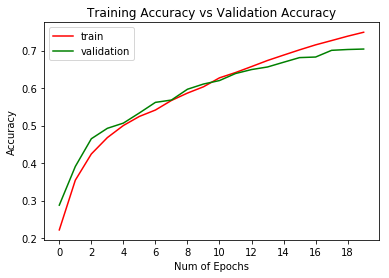

Loss graph before Augmentation


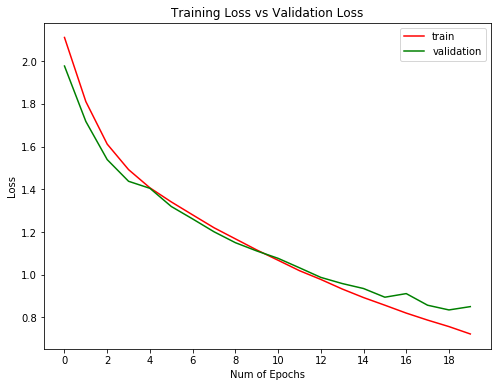

Accuracy graph after Augmentation


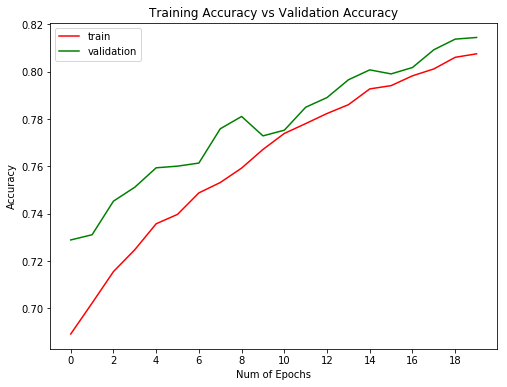

Loss graph after Augmentation


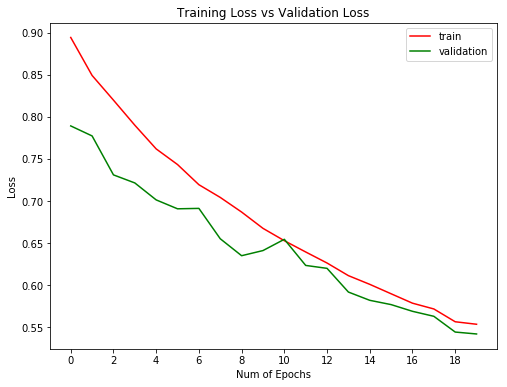

In [12]:
import numpy as np
plt.figure(0)
plt.plot(realmodel.history['acc'],'r')
plt.plot(realmodel.history['val_acc'],'g')
plt.xticks(np.arange(0, 20, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
print('Accuracy graph before Augmentation')
plt.show()

plt.figure(1)
plt.plot(realmodel.history['loss'],'r')
plt.plot(realmodel.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
print('Loss graph before Augmentation')
plt.show()

plt.figure(3)
plt.plot(model_info.history['acc'],'r')
plt.plot(model_info.history['val_acc'],'g')
plt.xticks(np.arange(0, 20, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
print('Accuracy graph after Augmentation')
plt.show()

plt.figure(4)
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
print('Loss graph after Augmentation')
plt.show()

## Transfer Learning (Benchmark Model)
- Transfer learning is a great technique that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.
- In transfer Learning we use pretrained network and remove its last fully connected layer and use the rest of the network for extracting features for our new dataset on which we want to predict on. Example - Take a ConvNet that has been pre-trained on ImageNet, remove the last fully-connected layer, then treat the rest of the ConvNet as a feature extractor for the new dataset. Once you extract the features for all images, train a classifier for the new dataset.
- And here we will do the same. We will use inception-v3 model and remove its fully connected layer and add new layers as we need to classify on CIFAR-10 (which contains 10 classes) and the model is trained on imagenet (which contains 1000 classes).

### Preproess the inputs for Inception-v3 model
We will now resize the inputs from CIFAR-10 dataset as it contains images of dimensions 32x32 and inception-v3 model is trained on the images having dimensions 299x299 and it can only accept a minimum size of 139x139. We are performing transpose(2, 0, 1) operation because when we load the image, the 3d tensor have the dimsions in that order (width, height, channel). We need them in that order: (channel, width, height). 

In [1]:
import cv2
import numpy as np

from keras.datasets import cifar10
from keras import backend as K
from keras.utils import np_utils

# As it is a time taking process so we will not use the whole CIFAR-10 data
nb_train_samples = 3000 # 3000 training samples
nb_valid_samples = 100 # 100 validation samples
num_classes = 10

def load_cifar10_data(img_rows, img_cols):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

    # Resize trainging images
    if K.image_dim_ordering() == 'th':
        X_train = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in X_train[:nb_train_samples,:,:,:]])
        X_valid = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in X_valid[:nb_valid_samples,:,:,:]])
    else:
        X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:nb_train_samples,:,:,:]])
        X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:nb_valid_samples,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train[:nb_train_samples], num_classes)
    Y_valid = np_utils.to_categorical(Y_valid[:nb_valid_samples], num_classes)

    return X_train, Y_train, X_valid, Y_valid

Using TensorFlow backend.


## Inception-v3 model
Inception-v3 is trained for the ImageNet Large Visual Recognition Challenge using the data from 2012. This is a standard task in computer vision, where models try to classify entire images into 1000 classes, like "Zebra", "Dalmatian", and "Dishwasher".
Here is the link for the code of Inception-v3 - https://github.com/kerasteam/keras/blob/master/keras/applications/inception_v3.py

In [2]:

from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten
from keras.layers import merge, Reshape, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import backend as K
from sklearn.metrics import log_loss

def conv2d_bn(x, nb_filter, nb_row, nb_col, border_mode='same', subsample=(1, 1), name=None):
    """
    Utility function to apply conv + BN for Inception V3.
    """
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
    bn_axis = 1
    x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, activation='relu', border_mode=border_mode,
                      name=conv_name)(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name)(x)
    return x

def inception_v3_model(img_rows, img_cols, channel=1, num_classes=None):
    """
    Inception-V3 Model for Keras
    Model Schema is based on 
    https://github.com/fchollet/deep-learning-models/blob/master/inception_v3.py
    ImageNet Pretrained Weights 
    https://github.com/fchollet/deep-learning-models/releases/download/v0.2/inception_v3_weights_th_dim_ordering_th_kernels.h5
    Parameters:
      img_rows, img_cols - resolution of inputs
      channel - 1 for grayscale, 3 for color 
      num_classes - number of class labels for our classification task
    """
    K.set_image_dim_ordering('th')
    channel_axis = 1
    img_input = Input(shape=(channel, img_rows, img_cols))
    x = conv2d_bn(img_input, 32, 3, 3, subsample=(2, 2), border_mode='valid')
    x = conv2d_bn(x, 32, 3, 3, border_mode='valid')
    x = conv2d_bn(x, 64, 3, 3)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv2d_bn(x, 80, 1, 1, border_mode='valid')
    x = conv2d_bn(x, 192, 3, 3, border_mode='valid')
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # mixed 0, 1, 2: 35 x 35 x 256
    for i in range(3):
        branch1x1 = conv2d_bn(x, 64, 1, 1)

        branch5x5 = conv2d_bn(x, 48, 1, 1)
        branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

        branch3x3dbl = conv2d_bn(x, 64, 1, 1)
        branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
        branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), border_mode='same')(x)
        branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
        x = merge([branch1x1, branch5x5, branch3x3dbl, branch_pool], mode='concat', concat_axis=channel_axis,
                  name='mixed' + str(i))

    # mixed 3: 17 x 17 x 768
    branch3x3 = conv2d_bn(x, 384, 3, 3, subsample=(2, 2), border_mode='valid')

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3, subsample=(2, 2), border_mode='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = merge([branch3x3, branch3x3dbl, branch_pool], mode='concat', concat_axis=channel_axis, name='mixed3')

    # mixed 4: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 128, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 128, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 128, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), border_mode='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = merge([branch1x1, branch7x7, branch7x7dbl, branch_pool], mode='concat', concat_axis=channel_axis, name='mixed4')

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = conv2d_bn(x, 192, 1, 1)

        branch7x7 = conv2d_bn(x, 160, 1, 1)
        branch7x7 = conv2d_bn(branch7x7, 160, 1, 7)
        branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

        branch7x7dbl = conv2d_bn(x, 160, 1, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 1, 7)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

        branch_pool = AveragePooling2D((3, 3), strides=(1, 1), border_mode='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = merge([branch1x1, branch7x7, branch7x7dbl, branch_pool], mode='concat', concat_axis=channel_axis,
                  name='mixed' + str(5 + i))

    # mixed 7: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 192, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 192, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 160, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), border_mode='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = merge([branch1x1, branch7x7, branch7x7dbl, branch_pool], mode='concat', concat_axis=channel_axis, name='mixed7')

    # mixed 8: 8 x 8 x 1280
    branch3x3 = conv2d_bn(x, 192, 1, 1)
    branch3x3 = conv2d_bn(branch3x3, 320, 3, 3, subsample=(2, 2), border_mode='valid')

    branch7x7x3 = conv2d_bn(x, 192, 1, 1)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 1, 7)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 7, 1)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 3, 3, subsample=(2, 2), border_mode='valid')

    branch_pool = AveragePooling2D((3, 3), strides=(2, 2))(x)
    x = merge([branch3x3, branch7x7x3, branch_pool], mode='concat', concat_axis=channel_axis, name='mixed8')

    # mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = conv2d_bn(x, 320, 1, 1)

        branch3x3 = conv2d_bn(x, 384, 1, 1)
        branch3x3_1 = conv2d_bn(branch3x3, 384, 1, 3)
        branch3x3_2 = conv2d_bn(branch3x3, 384, 3, 1)
        branch3x3 = merge([branch3x3_1, branch3x3_2], mode='concat', concat_axis=channel_axis, name='mixed9_' + str(i))

        branch3x3dbl = conv2d_bn(x, 448, 1, 1)
        branch3x3dbl = conv2d_bn(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = merge([branch3x3dbl_1, branch3x3dbl_2], mode='concat', concat_axis=channel_axis)

        branch_pool = AveragePooling2D((3, 3), strides=(1, 1), border_mode='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = merge([branch1x1, branch3x3, branch3x3dbl, branch_pool], mode='concat', concat_axis=channel_axis,
                  name='mixed' + str(9 + i))

    # Fully Connected Softmax Layer
    x_fc = AveragePooling2D((8, 8), strides=(8, 8), name='avg_pool')(x)
    x_fc = Flatten(name='flatten')(x_fc)
    x_fc = Dense(1000, activation='softmax', name='predictions')(x_fc)

    # Create model
    model = Model(img_input, x_fc)

    # Load ImageNet pre-trained data 
    model.load_weights('inception_v3_weights_th_dim_ordering_th_kernels.h5')

    # Truncate and replace softmax layer for transfer learning
    # Cannot use model.layers.pop() since model is not of Sequential() type
    # The method below works since pre-trained weights are stored in layers but not in the model
    x_newfc = AveragePooling2D((8, 8), strides=(8, 8), name='avg_pool')(x)
    x_newfc = Flatten(name='flatten')(x_newfc)
    x_newfc = Dense(num_classes, activation='softmax', name='predictions')(x_newfc)

    # Create another model with our customized softmax
    model = Model(img_input, x_newfc)

    # Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model 

## Training Inception-v3 model after fine-tuning

In [4]:
import time
if __name__ == '__main__':

    # Example to fine-tune on 3000 samples from Cifar10

    img_rows, img_cols = 299, 299 # Resolution of inputs for inception_v3_model
    channel = 3
    num_classes = 10 
    batch_size = 40 
    nb_epoch = 10

    # Load Cifar10 data. Please implement your own load_data() module for your own dataset
    X_train, Y_train, X_valid, Y_valid = load_cifar10_data(img_rows, img_cols)

    # Load our model
    model = inception_v3_model(img_rows, img_cols, channel, num_classes)
    
    # Start Fine-tuning
    start = time.time()
    bench_model = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, shuffle=True, verbose=1, 
              validation_data=(X_valid, Y_valid))
    end = time.time()
    # Training time
    print('Model took %.2f seconds to train'%(end - start))

c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", name=None, strides=(2, 2), padding="valid")`
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", name=None, strides=(1, 1), padding="valid")`
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name=None, strides=(1, 1), padding="same")`
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(80, (1, 1), activation="relu", name=None, strides=(1, 1), padding="valid")`
c:\users\sharm\appdata\local\programs

c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 1), activation="relu", name=None, strides=(1, 1), padding="same")`
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:150: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(448, (1, 1), activation="relu", name=None, strides=(1, 1), padding="same")`
c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), activation="relu", name=None, strides=(1, 1), padding="same")`
c:\users\sharm\ap

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 3, 299, 299)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 32, 149, 149) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 32, 149, 149) 128         conv2d_95[0][0]                  
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 32, 147, 147) 9248        batch_normalization_95[0][0]     
__________________________________________________________________________________________________
batch_norm

c:\users\sharm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


conv2d_124 (Conv2D)             (None, 96, 17, 17)   83040       batch_normalization_123[0][0]    
__________________________________________________________________________________________________
batch_normalization_121 (BatchN (None, 384, 17, 17)  1536        conv2d_121[0][0]                 
__________________________________________________________________________________________________
batch_normalization_124 (BatchN (None, 96, 17, 17)   384         conv2d_124[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 256, 17, 17)  0           mixed2[0][0]                     
__________________________________________________________________________________________________
mixed3 (Merge)                  (None, 736, 17, 17)  0           batch_normalization_121[0][0]    
                                                                 batch_normalization_124[0][0]    
          

3000/3000 [==============================] - 5766s 2s/step - loss: 1.7263 - acc: 0.3677 - val_loss: 1.9934 - val_acc: 0.3100
Epoch 2/10
3000/3000 [==============================] - 5779s 2s/step - loss: 0.9776 - acc: 0.6663 - val_loss: 1.2541 - val_acc: 0.6000
Epoch 3/10
3000/3000 [==============================] - 5736s 2s/step - loss: 0.5854 - acc: 0.8077 - val_loss: 1.1232 - val_acc: 0.6100
Epoch 4/10
3000/3000 [==============================] - 5770s 2s/step - loss: 0.3457 - acc: 0.8987 - val_loss: 0.9315 - val_acc: 0.6600
Epoch 5/10
3000/3000 [==============================] - 7689s 3s/step - loss: 0.1917 - acc: 0.9573 - val_loss: 0.8931 - val_acc: 0.7000
Epoch 6/10
3000/3000 [==============================] - 5727s 2s/step - loss: 0.1059 - acc: 0.9800 - val_loss: 0.8694 - val_acc: 0.7200
Epoch 7/10
3000/3000 [==============================] - 5737s 2s/step - loss: 0.0626 - acc: 0.9933 - val_loss: 0.8497 - val_acc: 0.7100
Epoch 8/10
3000/3000 [==============================] - 573

## Evaluate model on test data

In [23]:
nb_valid_samples = 10000
A_train, B_train, A_valid, B_valid = load_cifar10_data(img_rows, img_cols)
scores = model.evaluate(A_valid, B_valid, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 10437s 1s/step
Accuracy: 75.39%


## Visualizing the Predictions of Inception-v3

Accuracy graph of benchmark model


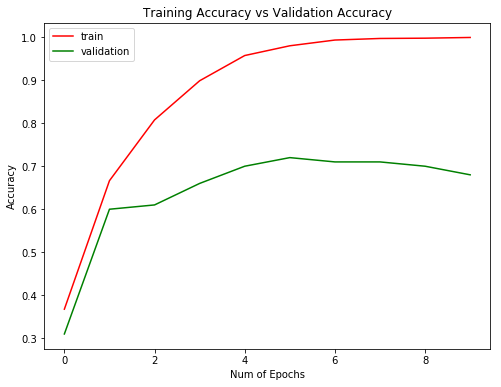

Loss graph of benchmark model


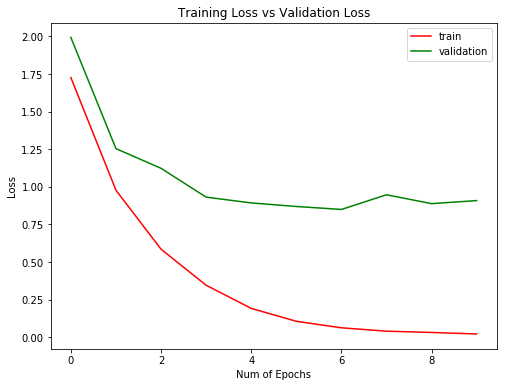

In [24]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(bench_model.history['acc'],'r')
plt.plot(bench_model.history['val_acc'],'g')
plt.xticks(np.arange(0, 10, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
print('Accuracy graph of benchmark model')
plt.show()

plt.figure(1)
plt.plot(bench_model.history['loss'],'r')
plt.plot(bench_model.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
print('Loss graph of benchmark model')
plt.show()

Our benchmark model got 75.39% of accuracy because we trained the model only on 3000 images for 10 epochs. If we train the model on the full dataset of 50000 images with a good amount of epochs the accuracy will definitely improve alot. I ran the model for only 3000 images and only for 10 epochs because of lack of time as i am running is code on CPU due to some problems. Running it on GPU will definitely improve performance. 